# 중국 라면 데이터 분석
- 표본 수가 가장 많은 브랜드의 평균 구해서 시각화
- 라면 스타일별로 평점 카운트
- 해당 브랜드에서 평점이 가장 좋은 라면들의 특징
- 해당 브랜드에서 평점이 가장 낮은 라면들의 특징

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_name=r'/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/PANDAS/시각화/프로젝트/ramen.csv'
ramen_df=pd.read_csv(file_name)

In [ ]:
ramen_df

,Review #,Brand,Variety,Style,Country,Stars,T
0,4650,Jasmine,XXL Bihun Segera Penang White Curry,Pack,Malaysia,5,NaN
1,4649,Indomie,Mi Instan Mi Keriting Goreng Spesial,Pack,Indonesia,5,NaN
2,4648,MAMA,Oriental Kitchen Dried Instant Noodles Truffle...,Pack,Thailand,4.5,NaN
3,4647,Ottogi,Jin Jjajang Smoked Black Bean Flavor,Pack,United States,4.5,NaN
4,4646,Samyang Foods,Samyand Ramen,Pack,United States,5,NaN
...,...,...,...,...,...,...,...
4645,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
4646,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1,NaN
4647,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2,NaN
4648,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2,NaN


In [ ]:
# 중국만 추출하여 저장

ramen_df_ch=ramen_df[ramen_df['Country']=='China'].copy()

# 표본 수가 가장 많은 브랜드의 평균 구해서 시각화
- 중복값 확인 및 처리
- 브랜드명 재정의 - 추가적 전처리
- 결측치 확인 및 처리
- 이상치 확인 및 처리

## 중복값 검사 및 처리

In [ ]:
# 중복값 검사 및 처리

ramen_df_ch.iloc[:,1:].duplicated().sum()

1

In [ ]:
ramen_df_ch.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'T'], dtype='object')

In [ ]:
ramen_df_ch.drop_duplicates(subset=['Brand', 'Variety', 'Style', 'Stars'], inplace=True)

# 리뷰 넘버는 중복이 안 되므로 이후 열들로 중복 행 삭제

In [ ]:
ramen_df_ch.iloc[:,1:].duplicated().sum()

0

In [ ]:
ramen_df_ch=ramen_df_ch[['Review #','Brand', 'Variety', 'Style','Stars']].copy()

In [ ]:
ramen_df_ch.reset_index(drop=True, inplace=True)

In [ ]:
ramen_df_ch

,Review #,Brand,Variety,Style,Stars
0,4636,Fan's,Hot & Sour Pork Bone Ramen,Cup,4.25
1,4608,Jinmailiang,Udon Noodles With Seafood Flavor,Pack,4
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5
3,4549,Ramen Talk,Tom Yum Goong,Pack,5
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5
...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.3
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1


## 브랜드명 재저장

Baixiang Noodles -> Baixiang

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=='Baixiang Noodles']

,Review #,Brand,Variety,Style,Stars
216,1723,Baixiang Noodles,Artificial Beef Instant Noodles With Soup Base,Pack,3.75
218,1704,Baixiang Noodles,Sour & Spicy Flavour,Pack,3.75
228,1675,Baixiang Noodles,Sauerkraut Flavor,Pack,4.5
233,1624,Baixiang Noodles,Artificial Pork Flavour,Pack,3
246,1409,Baixiang Noodles,Spicy Artificial Beef Flavour Instant Noodles ...,Pack,3.5


In [ ]:
ramen_df_ch.loc[[216,218,228,233,246],'Brand']="Baixiang"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=='Baixiang Noodles']

,Review #,Brand,Variety,Style,Stars


Fan's -> Fan's Kitchen

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Fan's"]

,Review #,Brand,Variety,Style,Stars
0,4636,Fan's,Hot & Sour Pork Bone Ramen,Cup,4.25


In [ ]:
ramen_df_ch.loc[0,'Brand']="Fan's Kitchen"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Fan's"]

,Review #,Brand,Variety,Style,Stars


Hua Feng -> Hua Feng Noodle Expert

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Hua Feng"]

,Review #,Brand,Variety,Style,Stars
176,2388,Hua Feng,Three Fresh Delicacies Instant Noodle,Pack,4.25


In [ ]:
ramen_df_ch.loc[176,'Brand']="Hua Feng Noodle Expert"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Hua Feng"]

,Review #,Brand,Variety,Style,Stars


Jinmailiang -> Jinmailang

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Jinmailiang"]

,Review #,Brand,Variety,Style,Stars
1,4608,Jinmailiang,Udon Noodles With Seafood Flavor,Pack,4


In [ ]:
ramen_df_ch.loc[1,'Brand']="Jinmailang"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Jinmailiang"]

,Review #,Brand,Variety,Style,Stars


Lau Liu tou -> Lau Liu Tou

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Lau Liu tou"]

,Review #,Brand,Variety,Style,Stars
125,3214,Lau Liu tou,Beef Flavor Spicy Soup,Bowl,4


In [ ]:
ramen_df_ch.loc[125,'Brand']="Lau Liu Tou"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Lau Liu tou"]

,Review #,Brand,Variety,Style,Stars


Liangchengmei -> Liang Cheng Mai

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Liangchengmei"]

,Review #,Brand,Variety,Style,Stars
129,3132,Liangchengmei,Biang Biang Men,Box,5
153,2817,Liangchengmei,30 Second Hot Bird Noodle,Box,3.75


In [ ]:
ramen_df_ch.loc[[129,153],'Brand']="Liang Cheng Mai"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Liangchengmei"]

,Review #,Brand,Variety,Style,Stars


Sao Tao -> Sau Tao

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Sao Tao"]

,Review #,Brand,Variety,Style,Stars
325,208,Sao Tao,Ramen King Scallop Seafood,Pack,4.25


In [ ]:
ramen_df_ch.loc[326,'Brand']="Sau Tao"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Sao Tao"]

,Review #,Brand,Variety,Style,Stars
325,208,Sao Tao,Ramen King Scallop Seafood,Pack,4.25


Shoo Long Kan -> Shoo Loong Kan

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Shoo Long Kan"]

,Review #,Brand,Variety,Style,Stars
41,4186,Shoo Long Kan,Hot Pot Vermicelli Hot and Sour Rice Noodles,Box,NaN


In [ ]:
ramen_df_ch.loc[41,'Brand']="Shoo Loong Kan"

In [ ]:
ramen_df_ch[ramen_df_ch['Brand']=="Shoo Long Kan"]

,Review #,Brand,Variety,Style,Stars


In [ ]:
ramen_df_ch['Brand'].value_counts()

Brand
JML                    29
Master Kong            29
Sichuan Baijia         28
Dragonfly              13
Baixiang               13
                       ..
New Touch               1
Kailo Brand             1
Namchang                1
Nan Chuan Dao Sheng     1
Sao Tao                 1
Name: count, Length: 95, dtype: int64

In [ ]:
ramen_df_ch['Stars'].sort_values(ascending=False)

88       5
55       5
236      5
130      5
207      5
      ... 
121      0
185      0
201      0
167      0
41     NaN
Name: Stars, Length: 333, dtype: object

## 결측치 확인 및 처리

In [ ]:
# 결측치 확인

ramen_df_ch.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Stars       1
dtype: int64

In [ ]:
ramen_df_ch[ramen_df_ch['Stars'].isna()]

,Review #,Brand,Variety,Style,Stars
41,4186,Shoo Loong Kan,Hot Pot Vermicelli Hot and Sour Rice Noodles,Box,NaN


In [ ]:
ramen_df_ch.loc[41,'Stars']=2.0 # 앞에서 소개한 ramen rater 사이트에서 해당 리뷰를 찾아서 수정

In [ ]:
ramen_df_ch.isna().sum()

Review #    0
Brand       0
Variety     0
Style       0
Stars       0
dtype: int64

In [ ]:
ramen_df_ch.iloc[41,:]

Review #                                            4186
Brand                                     Shoo Loong Kan
Variety     Hot Pot Vermicelli Hot and Sour Rice Noodles
Style                                                Box
Stars                                                2.0
Name: 41, dtype: object

In [ ]:
ramen_df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  333 non-null    int64 
 1   Brand     333 non-null    object
 2   Variety   333 non-null    object
 3   Style     333 non-null    object
 4   Stars     333 non-null    object
dtypes: int64(1), object(4)
memory usage: 13.1+ KB


In [ ]:
ramen_df_ch['Stars']=ramen_df_ch['Stars'].astype(float) # 평점 평균을 내기 위해 float으로 형변환

In [ ]:
ramen_df_ch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  333 non-null    int64  
 1   Brand     333 non-null    object 
 2   Variety   333 non-null    object 
 3   Style     333 non-null    object 
 4   Stars     333 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.1+ KB


## 이상치 확인 및 처리

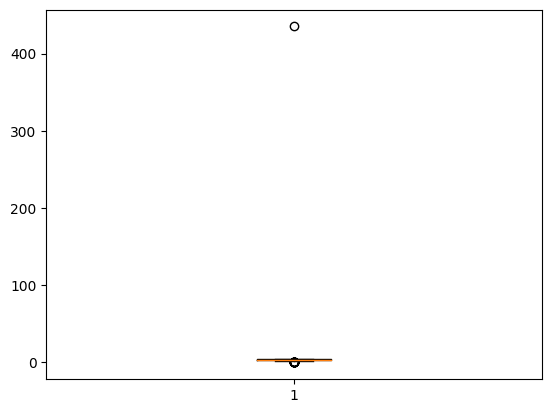

In [ ]:
ramen_china=plt.boxplot(ramen_df_ch['Stars'])
plt.show()

In [ ]:
# 박스 그래프에서 받은 결과 확인

for k, v in ramen_china.items():
  print(k,v)
  for _ in v:
    print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x7aabcd09fa60>, <matplotlib.lines.Line2D object at 0x7aabcd09fd00>]
(array([1, 1]), array([3.25, 1.5 ]))
(array([1, 1]), array([4.5, 5. ]))
caps [<matplotlib.lines.Line2D object at 0x7aabcd09ffa0>, <matplotlib.lines.Line2D object at 0x7aabcd0e4280>]
(array([0.9625, 1.0375]), array([1.5, 1.5]))
(array([0.9625, 1.0375]), array([5., 5.]))
boxes [<matplotlib.lines.Line2D object at 0x7aabcd09f760>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([3.25, 3.25, 4.5 , 4.5 , 3.25]))
medians [<matplotlib.lines.Line2D object at 0x7aabcd0e4520>]
(array([0.925, 1.075]), array([3.75, 3.75]))
fliers [<matplotlib.lines.Line2D object at 0x7aabcd0e47c0>]
(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.]), array([0.00e+00, 1.00e+00, 5.00e-01, 0.00e+00, 0.00e+00, 0.00e+00,
       1.00e+00, 2.50e-01, 0.00e+00, 2.50e-01, 1.00e+00, 0.00e+00,
       0.00e+00, 5.00e-01, 1.25e+00, 5.00e-01, 0.00e+00, 0.00e+00,
 

In [ ]:
outliers=ramen_china['caps']
outliers[0].get_data() # 1번 데이터를 뺌
outliers[1].get_data()

(array([0.9625, 1.0375]), array([5., 5.]))

In [ ]:
outliers[0].get_data()[1].tolist(), outliers[1].get_data()[1].tolist() # 이상치 기준 뽑음

([1.5, 1.5], [5.0, 5.0])

In [ ]:
low_outlier=outliers[0].get_data()[1].tolist()[0]
up_outlier=outliers[1].get_data()[1].tolist()[0]

low_outlier,up_outlier

(1.5, 5.0)

In [ ]:
# 이상치 확인
ramen_df_ch[ramen_df_ch['Stars']<0]

,Review #,Brand,Variety,Style,Stars


In [ ]:
# 이상치 확인
ramen_df_ch[ramen_df_ch['Stars']>up_outlier]

,Review #,Brand,Variety,Style,Stars
5,4531,Shoo Loong Kan,Lan Zhou La Mian,Box,435.0


In [ ]:
ramen_df_ch.loc[5,'Stars']=4.5 # 앞에서 소개한 ramen rater 사이트에서 해당 리뷰를 찾아서 수정
ramen_df_ch.loc[5,'Stars']

4.5

In [ ]:
ramen_df_ch[ramen_df_ch['Stars']>up_outlier]

,Review #,Brand,Variety,Style,Stars


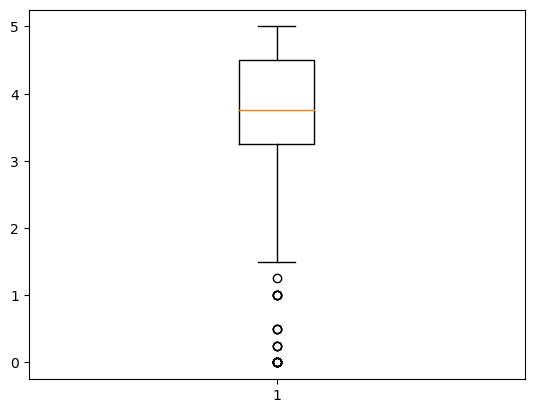

In [ ]:
ramen_china=plt.boxplot(ramen_df_ch['Stars'])
plt.show() # 평점의 최소 점수는 0이므로 이상치라고 할 수 없음

In [ ]:
for k, v in ramen_china.items():
  print(k,v)
  for _ in v:
    print(_.get_data())

whiskers [<matplotlib.lines.Line2D object at 0x7aabcafce260>, <matplotlib.lines.Line2D object at 0x7aabcafce500>]
(array([1, 1]), array([3.25, 1.5 ]))
(array([1, 1]), array([4.5, 5. ]))
caps [<matplotlib.lines.Line2D object at 0x7aabcafce7a0>, <matplotlib.lines.Line2D object at 0x7aabcafcea40>]
(array([0.9625, 1.0375]), array([1.5, 1.5]))
(array([0.9625, 1.0375]), array([5., 5.]))
boxes [<matplotlib.lines.Line2D object at 0x7aabcafcdf60>]
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([3.25, 3.25, 4.5 , 4.5 , 3.25]))
medians [<matplotlib.lines.Line2D object at 0x7aabcafcece0>]
(array([0.925, 1.075]), array([3.75, 3.75]))
fliers [<matplotlib.lines.Line2D object at 0x7aabcafcef80>]
(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.]), array([0.  , 1.  , 0.5 , 0.  , 0.  , 0.  , 1.  , 0.25, 0.  , 0.25, 1.  ,
       0.  , 0.  , 0.5 , 1.25, 0.5 , 0.  , 0.  , 0.25, 0.  , 1.  ]))
means []


In [ ]:
ramen_df_ch['Stars']

0      4.25
1      4.00
2      5.00
3      5.00
4      5.00
       ... 
328    0.00
329    2.30
330    1.75
331    1.00
332    3.00
Name: Stars, Length: 333, dtype: float64

In [ ]:
ramen_df_ch_brand=pd.DataFrame(ramen_df_ch['Brand'].value_counts().sort_index())
ramen_df_ch_brand

,count
Brand,
Artisan,2
BAMAN,1
Bagu,1
Baijia,11
Baixiang,13
...,...
Xiuhe,1
Ya Shu,2
Yibin,1


In [ ]:
len(ramen_df_ch['Brand'].unique())

95

In [ ]:
ramen_df_ch['Variety'].value_counts()

Variety
Artificial Spicy Beef                              3
Artificial Stew Beef                               2
Chongqing Noodles Burning Dry Noodles              2
Artificial Pork Bone Soup Flavor Instant Noodle    2
Spicy Beef                                         2
                                                  ..
Tomato Egg Instant Noodles                         1
Dried Noodles Braised Chicken Flavor               1
Energy Instant Hot & Sour Flavor Vermicelli        1
Steam Noodle Tomato & Egg Flavor                   1
Spicy Seafood Flavor                               1
Name: count, Length: 319, dtype: int64

In [ ]:
ramen_df_ch_group=ramen_df_ch.groupby('Brand')

## 표본 수가 가장 많은 브랜드의 평균 구해서 시각화

In [ ]:
ramen_df_ch_group_d_s=ramen_df_ch_group.describe()['Stars'].sort_values("count",ascending=False)
# 표본수가 가장 많도록 내림차순 정렬하여 기초통계량 출력
# 표본 수가 너무 적으면 일반화 하기에 부적합
ramen_df_ch_group_d_s

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Master Kong,29.0,3.870690,0.895476,0.00,3.7500,4.00,4.25,5.00
JML,29.0,3.905172,0.794551,1.25,3.5000,3.75,4.25,5.00
Sichuan Baijia,28.0,3.767857,1.096984,1.00,3.4375,4.00,4.50,5.00
Dragonfly,13.0,4.057692,0.383974,3.50,3.7500,4.00,4.50,4.75
Baixiang,13.0,3.673077,0.482880,2.50,3.7500,3.75,3.75,4.50
...,...,...,...,...,...,...,...,...
Qi Shi Liu Ren,1.0,5.000000,NaN,5.00,5.0000,5.00,5.00,5.00
Qicaiyuan,1.0,4.250000,NaN,4.25,4.2500,4.25,4.25,4.25
Qin Zong,1.0,2.750000,NaN,2.75,2.7500,2.75,2.75,2.75


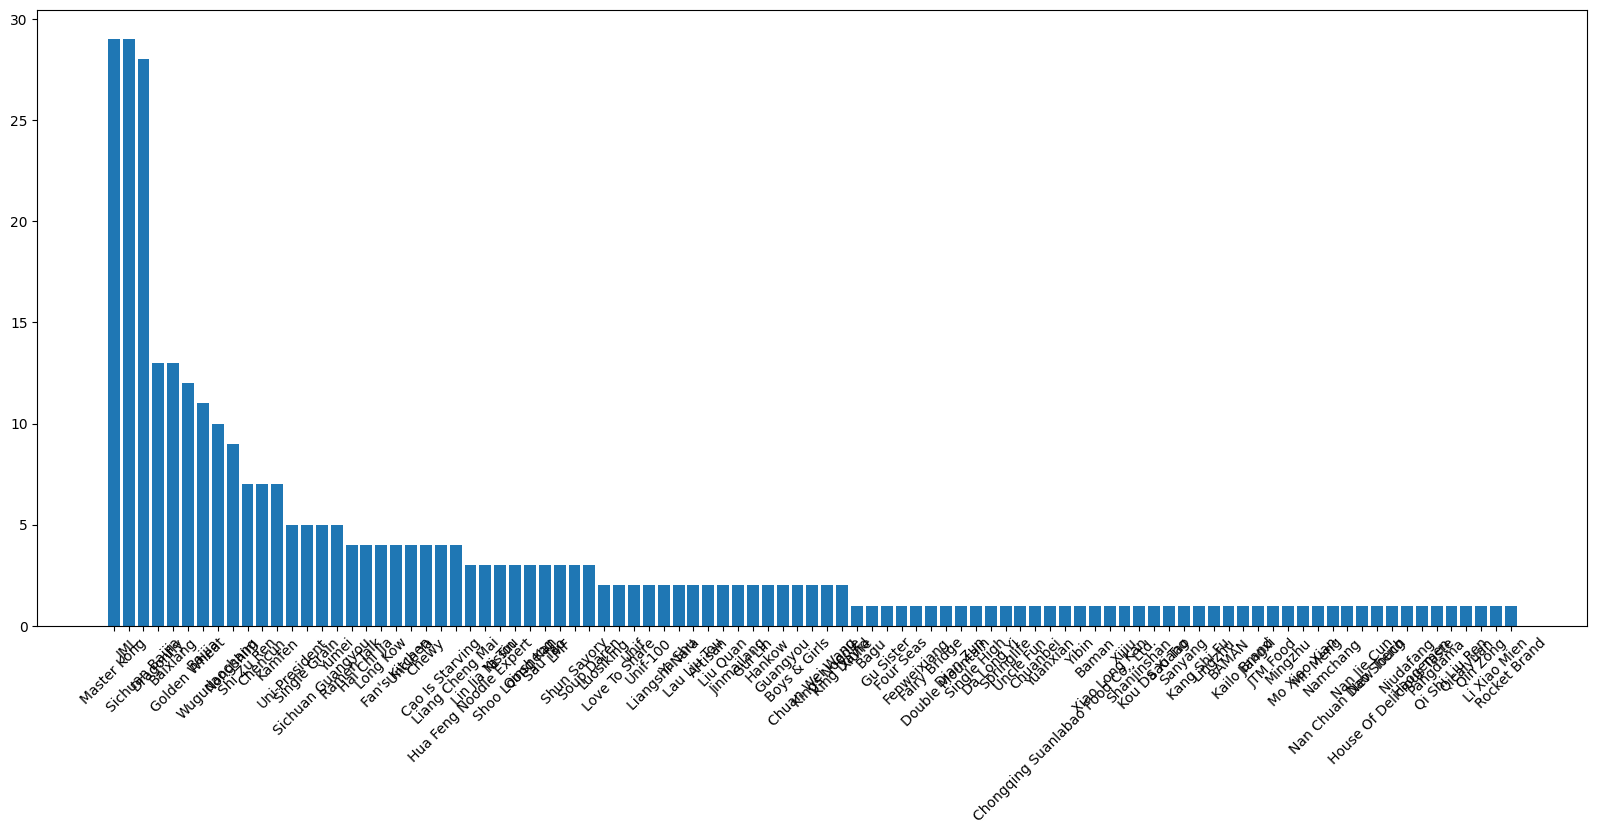

In [ ]:
plt.figure(figsize=(20,8))

plt.bar(ramen_df_ch_group_d_s.index, ramen_df_ch_group_d_s['count'])
plt.xticks(rotation=45)
plt.show()

위의 기초통계에서 출력한대로 Master Kong, JML, Sichuan Baijia의 브랜드의 데이터가 가장 많은 것으로 확인

In [ ]:
ramen_df_ch_group_d_s.iloc[:3] #

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
Master Kong,29.0,3.870690,0.895476,0.00,3.7500,4.00,4.25,5.0
JML,29.0,3.905172,0.794551,1.25,3.5000,3.75,4.25,5.0
Sichuan Baijia,28.0,3.767857,1.096984,1.00,3.4375,4.00,4.50,5.0


In [ ]:
ramen_df_ch_group_d_s.iloc[:3].index

Index(['Master Kong', 'JML', 'Sichuan Baijia'], dtype='object', name='Brand')

In [ ]:
list(ramen_df_ch_group_d_s.iloc[:3].index)

['Master Kong', 'JML', 'Sichuan Baijia']

In [ ]:
ramen_df_ch_group_d_s.iloc[:3]['mean']

Brand
Master Kong       3.870690
JML               3.905172
Sichuan Baijia    3.767857
Name: mean, dtype: float64

In [ ]:
np.round(ramen_df_ch_group_d_s.iloc[:3]['mean'].tolist(),2) # 평균값을 리스트로 만들어서 리스트의 모든 데이터를 반올림 하기 위해 numpy 사용

array([3.87, 3.91, 3.77])

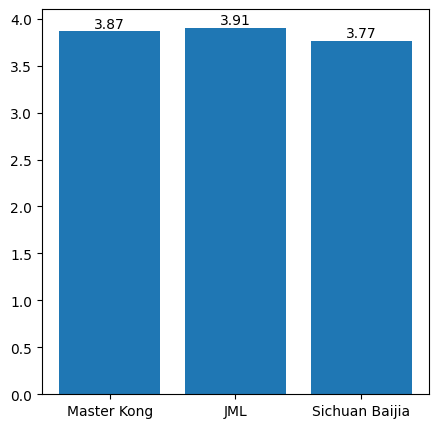

In [ ]:
plt.figure(figsize=(5,5))

origin_bar=plt.bar(ramen_df_ch_group_d_s.iloc[:3].index,ramen_df_ch_group_d_s.iloc[:3]['mean'])
plt.bar_label(origin_bar,list(np.round(ramen_df_ch_group_d_s.iloc[:3]['mean'].tolist(),2)))

plt.show()

브랜드 JML의 평점 평균이 가장 높다

# 라면 스타일별로 평점 카운트
- 평점을 구분하기 위해 반올림하여 새로 정의
- 스타일별 평점 계산해야 하므로 그룹화
- 기존 데이터에서 count 0인 데이터 추가

In [ ]:
ramen_df_ch

,Review #,Brand,Variety,Style,Stars
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00
...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00


In [ ]:
# 평점 반올림한 새로운 열 생성

ramen_df_ch['round_stars']=np.round(ramen_df_ch['Stars'])

In [ ]:
ramen_df_ch

,Review #,Brand,Variety,Style,Stars,round_stars
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25,4.0
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00,4.0
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00,5.0
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00,5.0
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00,5.0
...,...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00,0.0
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30,2.0
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75,2.0
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00,1.0


In [ ]:
# 스타일별 평점 계산해야 하므로 그룹화

ramen_df_ch_g_s=ramen_df_ch[['Style','round_stars']].groupby('Style')

ramen_df_ch_g_s.value_counts()

Style  round_stars
Bowl   4.0            49
       3.0            10
       5.0             9
       2.0             5
       0.0             2
       1.0             2
Box    5.0             7
       4.0             6
       3.0             3
       2.0             1
       0.0             1
Cup    4.0            32
       5.0            18
       3.0             9
       2.0             6
       0.0             3
Pack   4.0            87
       5.0            25
       3.0            18
       2.0             9
       0.0             6
       1.0             2
Tray   4.0            12
       0.0             4
       3.0             3
       2.0             2
       1.0             1
       5.0             1
Name: count, dtype: int64

In [ ]:
ramen_df_ch_g_s_df=pd.DataFrame(ramen_df_ch_g_s.value_counts())
# 그룹화한 데이터프레임의 value_counts
ramen_df_ch_g_s_df.sort_index(level=0,inplace=True)

In [ ]:
ramen_df_ch_g_s_df.reset_index(inplace=True)

In [ ]:
ramen_df_ch_g_s_df['style and round_stars']=ramen_df_ch_g_s_df['Style'].astype(str)+" "+ramen_df_ch_g_s_df['round_stars'].astype(str)
# 스타일과 평점을 한 번에 보기 위해 타입 변환하여 더한 새로운 열 생성

In [ ]:
ramen_df_ch_g_s_df

,Style,round_stars,count,style and round_stars
0,Bowl,0.0,2,Bowl 0.0
1,Bowl,1.0,2,Bowl 1.0
2,Bowl,2.0,5,Bowl 2.0
3,Bowl,3.0,10,Bowl 3.0
4,Bowl,4.0,49,Bowl 4.0
5,Bowl,5.0,9,Bowl 5.0
6,Box,0.0,1,Box 0.0
7,Box,2.0,1,Box 2.0
8,Box,3.0,3,Box 3.0
9,Box,4.0,6,Box 4.0


In [ ]:
ramen_df_ch_g_s_df['Style'].astype(str)

0     Bowl
1     Bowl
2     Bowl
3     Bowl
4     Bowl
5     Bowl
6      Box
7      Box
8      Box
9      Box
10     Box
11     Cup
12     Cup
13     Cup
14     Cup
15     Cup
16    Pack
17    Pack
18    Pack
19    Pack
20    Pack
21    Pack
22    Tray
23    Tray
24    Tray
25    Tray
26    Tray
27    Tray
Name: Style, dtype: object

In [ ]:
ramen_df_ch_g_s_df['count']

0      2
1      2
2      5
3     10
4     49
5      9
6      1
7      1
8      3
9      6
10     7
11     3
12     6
13     9
14    32
15    18
16     6
17     2
18     9
19    18
20    87
21    25
22     4
23     1
24     2
25     3
26    12
27     1
Name: count, dtype: int64

In [ ]:
ramen_df_ch_g_s_df.loc[28]=['Box',1.0,0,'Box 1.0']
ramen_df_ch_g_s_df.loc[29]=['Cup',1.0,0,'Cup 1.0']
ramen_df_ch_g_s_df

# 시각화를 위해 기존 데이터에서 Box와 Cup의 평점이 1인 데이터가 없어서 count를 0으로 하여 추가

,Style,round_stars,count,style and round_stars
0,Bowl,0.0,2,Bowl 0.0
1,Bowl,1.0,2,Bowl 1.0
2,Bowl,2.0,5,Bowl 2.0
3,Bowl,3.0,10,Bowl 3.0
4,Bowl,4.0,49,Bowl 4.0
5,Bowl,5.0,9,Bowl 5.0
6,Box,0.0,1,Box 0.0
7,Box,2.0,1,Box 2.0
8,Box,3.0,3,Box 3.0
9,Box,4.0,6,Box 4.0


In [ ]:
ramen_df_ch_g_s_df.sort_values(['Style','round_stars'], inplace=True)
ramen_df_ch_g_s_df.reset_index(inplace=True, drop=True)
ramen_df_ch_g_s_df

# 맨 마지막에 추가된 데이터들이 정렬을 통해 연속적으로 들어감

,Style,round_stars,count,style and round_stars
0,Bowl,0.0,2,Bowl 0.0
1,Bowl,1.0,2,Bowl 1.0
2,Bowl,2.0,5,Bowl 2.0
3,Bowl,3.0,10,Bowl 3.0
4,Bowl,4.0,49,Bowl 4.0
5,Bowl,5.0,9,Bowl 5.0
6,Box,0.0,1,Box 0.0
7,Box,1.0,0,Box 1.0
8,Box,2.0,1,Box 2.0
9,Box,3.0,3,Box 3.0


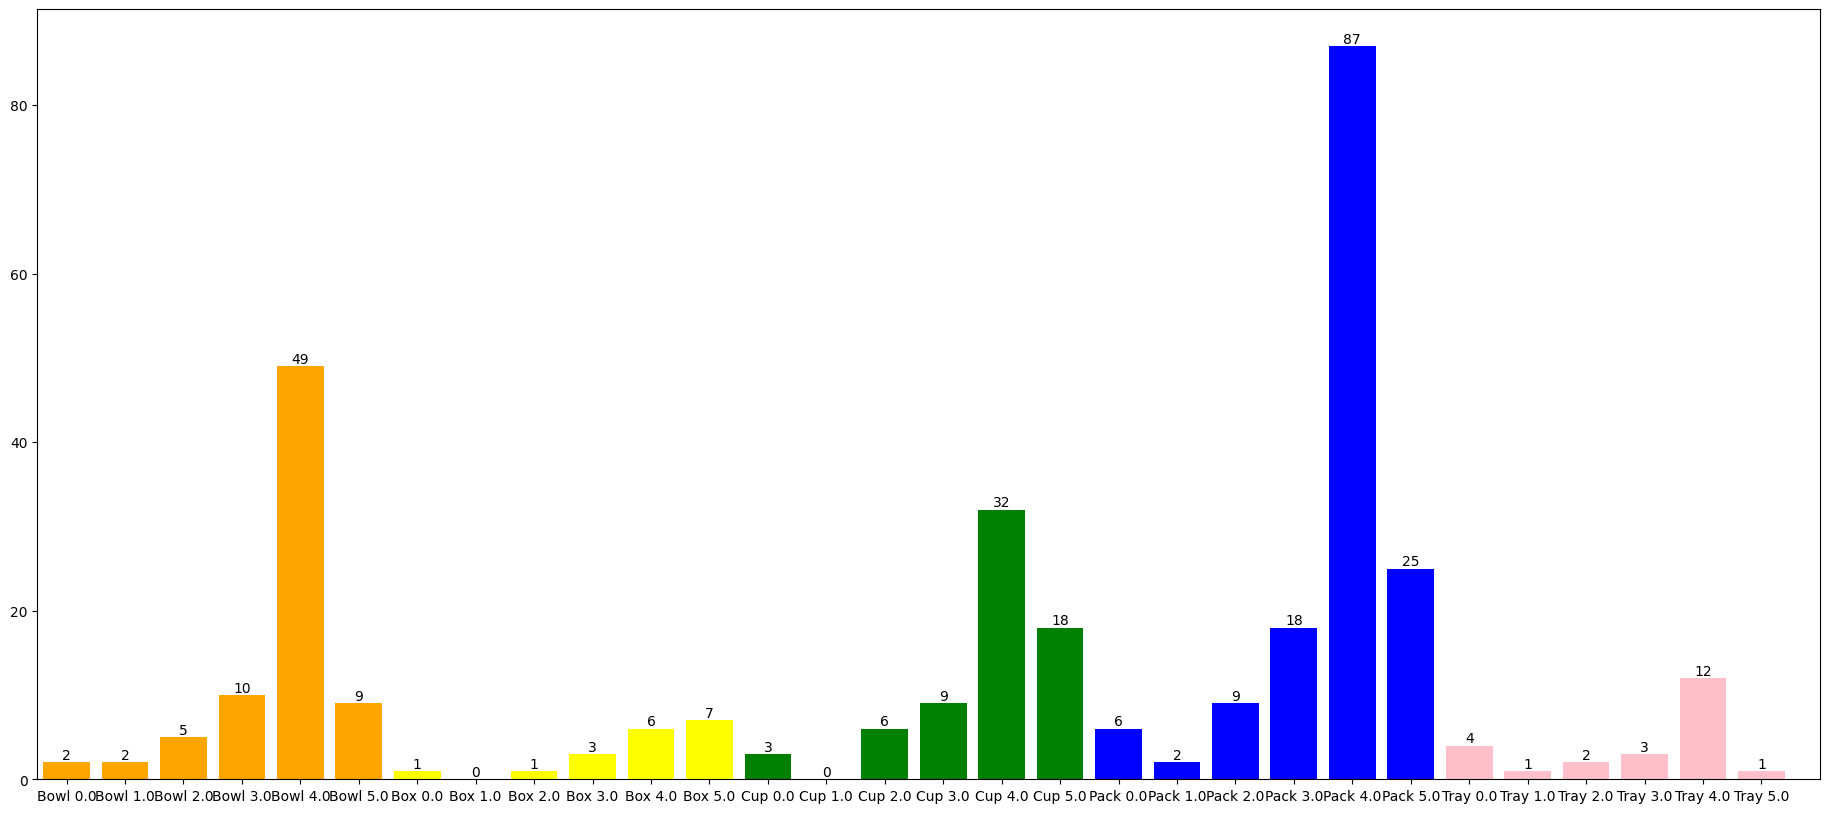

In [ ]:
plt.figure(figsize=(23,10))

colors=['orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink']
origin_bar=plt.bar(ramen_df_ch_g_s_df['style and round_stars'],height=ramen_df_ch_g_s_df['count'], color=colors)
plt.xlim(left=-0.5,right=len(ramen_df_ch_g_s_df.index))
plt.bar_label(origin_bar,ramen_df_ch_g_s_df['count'])

plt.show()

Pack 4.0의 데이터가 가장 많고 Bowl 4.0, Cup 4.0의 데이터 수도 많음.

# 평점이 가장 좋은 라면들의 특징
- WordCloud를 통한 시각화
- 단어 검색하여 라면 특성 파악

In [ ]:
ramen_df_ch[ramen_df_ch['Stars']==5]['Variety'].value_counts()

Variety
Chongqing Noodles                                                2
Chongqing Noodles Burning Dry Noodles                            2
Tomato Tonkotsu                                                  1
Tomato Sirloin Instant Broad Noodles                             1
Xiangnian Daoxiao Noodles                                        1
Steam Noodle Spicy Beef Flavor                                   1
Steam Noodle Tomato & Egg Flavor                                 1
Tomato Egg Instant Noodles                                       1
Back To Henan' Instant Noodle                                    1
Pork Bone Noodles                                                1
Biang Biang Men                                                  1
Golden Stock Shrimp Noodles                                      1
Xiamen Instant Noodles Satay Flavor                              1
Shin Black Bowl                                                  1
Spicy Pork Bone Noodle                                

위의 결과로 파이 그래프를 그려서 시각화 하려고 했지만 더 좋은 시각화 기법이 있어서 사용

In [ ]:
!pip install wordcloud

In [ ]:
ramen_df_ch

,Review #,Brand,Variety,Style,Stars,round_stars
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25,4.0
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00,4.0
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00,5.0
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00,5.0
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00,5.0
...,...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00,0.0
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30,2.0
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75,2.0
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00,1.0


In [ ]:
ramen_df_ch['style and round_stars']=ramen_df_ch['Style'].astype(str)+" "+ramen_df_ch['round_stars'].astype(str)
# 위와 동일하게 기존의 열을 더해서 새로운 열 생성
ramen_df_ch

,Review #,Brand,Variety,Style,Stars,round_stars,style and round_stars
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25,4.0,Cup 4.0
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00,4.0,Pack 4.0
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00,5.0,Pack 5.0
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00,5.0,Pack 5.0
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00,5.0,Pack 5.0
...,...,...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00,0.0,Pack 0.0
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30,2.0,Pack 2.0
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75,2.0,Pack 2.0
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00,1.0,Pack 1.0


In [ ]:
from wordcloud import WordCloud

In [ ]:
top_keyword = []
for i in ramen_df_ch.loc[ramen_df_ch['Stars']==5]['Variety']:
    a=i.split(' ')
    for h in a:
        top_keyword.append(h)

In [ ]:
while 'Noodle' in top_keyword:
  top_keyword.remove('Noodle')

while 'Noodles' in top_keyword:
  top_keyword.remove('Noodles')

while 'Instant' in top_keyword:
  top_keyword.remove('Instant')

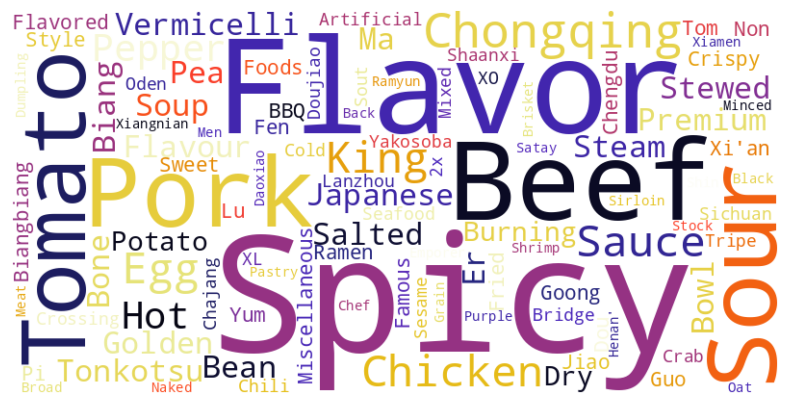

In [ ]:
text = ' '.join(top_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='CMRmap').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Spicy Flavor Pork Beef Tomato의 글자가 가장 크므로 많이 언급되었음을 알 수 있다.

=> 맵고 신 음식을 선호하고 돼지고기와 소고기, 토마토가 함께 포함된 라면은 평점이 높다는 사실이 밝혀졌다.

또한 향에 예민하다는 것을 알 수 있다.

In [ ]:
ramen_df_ch['word']=np.nan
ramen_df_ch

,Review #,Brand,Variety,Style,Stars,round_stars,style and round_stars,word
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25,4.0,Cup 4.0,NaN
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00,4.0,Pack 4.0,NaN
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00,5.0,Pack 5.0,NaN
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00,5.0,Pack 5.0,NaN
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00,5.0,Pack 5.0,NaN
...,...,...,...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00,0.0,Pack 0.0,NaN
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30,2.0,Pack 2.0,NaN
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75,2.0,Pack 2.0,NaN
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00,1.0,Pack 1.0,NaN


In [ ]:
ramen_df_ch['Variety'].count()

333

In [ ]:
for i in range(ramen_df_ch['Variety'].count()):
  ramen_df_ch.iloc[i,7]=str(ramen_df_ch.iloc[i,2].split(' '))
# 단어 검색 가능하도록 공백으로 나눔

In [ ]:
ramen_df_ch

,Review #,Brand,Variety,Style,Stars,round_stars,style and round_stars,word
0,4636,Fan's Kitchen,Hot & Sour Pork Bone Ramen,Cup,4.25,4.0,Cup 4.0,"['Hot', '&', 'Sour', 'Pork', 'Bone', 'Ramen']"
1,4608,Jinmailang,Udon Noodles With Seafood Flavor,Pack,4.00,4.0,Pack 4.0,"['Udon', 'Noodles', 'With', 'Seafood', 'Flavor']"
2,4560,Ramen Talk,Tomato Tonkotsu,Pack,5.00,5.0,Pack 5.0,"['Tomato', 'Tonkotsu']"
3,4549,Ramen Talk,Tom Yum Goong,Pack,5.00,5.0,Pack 5.0,"['Tom', 'Yum', 'Goong']"
4,4535,Ramen Talk,Pepper Crispy Pork Noodles,Pack,5.00,5.0,Pack 5.0,"['Pepper', 'Crispy', 'Pork', 'Noodles']"
...,...,...,...,...,...,...,...,...
328,133,Baijia,Hot & Sour Rice Noodle,Pack,0.00,0.0,Pack 0.0,"['Hot', '&', 'Sour', 'Rice', 'Noodle']"
329,90,Long Kow,Crystal Noodle Six Kinds Of Mushrooms,Pack,2.30,2.0,Pack 2.0,"['Crystal', 'Noodle', 'Six', 'Kinds', 'Of', 'M..."
330,69,Baijia,Spicy Fei- Chang Sweet Potato Noodle,Pack,1.75,2.0,Pack 2.0,"['Spicy', 'Fei-', 'Chang', 'Sweet', 'Potato', ..."
331,55,Hua Feng Noodle Expert,Favoury Pork Flavor,Pack,1.00,1.0,Pack 1.0,"['Favoury', 'Pork', 'Flavor']"


In [ ]:
ramen_df_ch['word']

0          ['Hot', '&', 'Sour', 'Pork', 'Bone', 'Ramen']
1       ['Udon', 'Noodles', 'With', 'Seafood', 'Flavor']
2                                 ['Tomato', 'Tonkotsu']
3                                ['Tom', 'Yum', 'Goong']
4                ['Pepper', 'Crispy', 'Pork', 'Noodles']
                             ...                        
328               ['Hot', '&', 'Sour', 'Rice', 'Noodle']
329    ['Crystal', 'Noodle', 'Six', 'Kinds', 'Of', 'M...
330    ['Spicy', 'Fei-', 'Chang', 'Sweet', 'Potato', ...
331                        ['Favoury', 'Pork', 'Flavor']
332                       ['Spicy', 'Seafood', 'Flavor']
Name: word, Length: 333, dtype: object

In [ ]:
def find_word(col):
  # 단어 검색 가능하도록 함수 정의
  list_word=[]
  for i in range(ramen_df_ch['Variety'].count()):
    if col in ramen_df_ch.iloc[i,7].strip("'[] "):
        list_word.append(ramen_df_ch.iloc[i,7])

    if i==(ramen_df_ch['Variety'].count()-1):
      return list_word


In [ ]:
find_word('Spicy')

["['Big', 'Bone', 'Noodle', 'Soup', 'Spicy', 'Pork', 'Flavor']",
 "['A-Kuan', 'Big', 'Boss', '–', 'Instant', 'Vermicelli', 'Spicy', 'Hot']",
 "['A-Kuan', 'Big', 'Boss', '–', 'Instant', 'Vermicelli', 'Spicy', 'And', 'Sesame', 'Flavor']",
 "['Sour', 'Spicy', 'Sweet', 'Potato', 'Noodles']",
 "['Golden', 'Soup', 'Sour', 'Spicy', 'Vermicelli']",
 "['Konjac', 'Spicy', '&', 'Sour', 'Noodles']",
 "['Chengdu', 'Sweet', '&', 'Spicy', 'Noodle']",
 "['Shaanxi', 'Cold', 'Noodle', 'Sout', '&', 'Spicy', 'Flavor']",
 "['One', 'Noodle', 'One', 'Soup', 'Spicy', 'Noodle']",
 "['Shaanxi', 'Cold', 'Noodle', 'Hot', '&', 'Spicy', 'Flavor']",
 "['2x', 'Spicy', 'Salted', 'Egg', 'Flavor']",
 "['Hot', '&', 'Spicy', 'Mixed', 'Instant', 'Noodle']",
 "['Premium', 'Instant', 'Noodles', 'Chongqing', 'Spicy', 'Flavor']",
 "['Spicy', 'Bean', 'Vermicelli', 'With', 'Oden']",
 "['Energy', 'Vegetarian', 'Spicy', 'Vermicelli']",
 "['Spicy', 'Sichuan', 'Pepper', 'Instant', 'Noodle']",
 "['Chongqing', 'Spicy', '&', 'Sour', 'R

In [ ]:
find_word('Tomato')

["['Tomato', 'Tonkotsu']",
 "['Dried', 'Noodles', 'Tomato', 'Flavor']",
 "['Steam', 'Noodle', 'Tomato', '&', 'Egg', 'Flavor']",
 "['Tomato', 'Egg', 'Instant', 'Noodles']",
 "['Tomato', 'Sirloin', 'Instant', 'Broad', 'Noodles']",
 "['Tomato', 'Sauce', 'Instant', 'Noodle']",
 "['Tomato', 'Sauce', 'Instant', 'Noodle']",
 "['Tomato', 'Beef', 'Brisket', 'Flavor', 'Purple', 'Potato', 'Noodle']"]

In [ ]:
ramen_df_ch.loc[ramen_df_ch['Stars']==5]['Variety']

2                                        Tomato Tonkotsu
3                                          Tom Yum Goong
4                             Pepper Crispy Pork Noodles
6                 Japanese Style BBQ Pork Tonkotsu Ramen
11              Non-Fried Instant Noodles Chicken Flavor
12                                     Chongqing Noodles
13                        Instant Noodle Sour Hot Flavor
18                     Sour Pepper Beef Flavored Noodles
19                 Xi'an Famous Foods Biangbiang Noodles
22                                       Er Lu Dou Pi Er
25              Noodle With Peas And Miscellaneous Sauce
28                     Golden Soup Sour Spicy Vermicelli
30                                    Jiao Ma Guo Ma Fen
32                          Chengdu Sweet & Spicy Noodle
33                            Crossing The Bridge Noodle
34               Shaanxi Cold Noodle Sout & Spicy Flavor
40                         Chongqing Instant Pea Noodles
42                             

# 평점이 가장 낮은 라면들의 특징

In [ ]:
low_keyword = []
for i in ramen_df_ch.loc[ramen_df_ch['Stars']==0]['Variety']:
    a=i.split(' ')
    for h in a:
        low_keyword.append(h)

In [ ]:
while 'Noodle' in low_keyword:
  low_keyword.remove('Noodle')

while 'Noodles' in low_keyword:
  low_keyword.remove('Noodles')

while 'Instant' in low_keyword:
  low_keyword.remove('Instant')

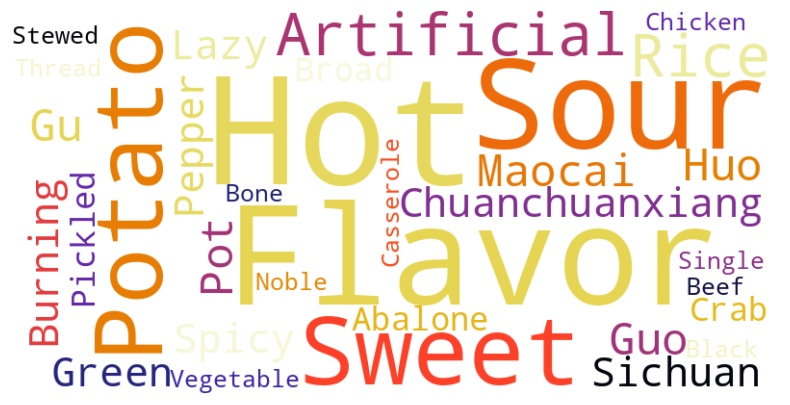

In [ ]:
text = ' '.join(low_keyword)

wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='CMRmap').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Hot, Sweet Potato, Flavor, Sour, Artificial 의 글자가 가장 크므로 많이 언급되었음을 알 수 있다.

=> 너무 시고 매운 음식을 선호하지 않고 고구마가 함께 포함된 라면은 평점이 낮다는 사실이 밝혀졌다.

또한 향에 예민하다는 것을 알 수 있고 인공적인 맛은 선호하지 않는다는 것을 알 수 있다.

In [ ]:
find_word('Hot')

["['Hot', '&', 'Sour', 'Pork', 'Bone', 'Ramen']",
 "['Fresh', 'Hot', '&', 'Sour', 'Sweet', 'Potato', 'Noodle']",
 "['Instant', 'Noodle', 'Sour', 'Hot', 'Flavor']",
 "['Hot', '&', 'Sour', 'Sweet', 'Potato', 'Noodles']",
 "['A-Kuan', 'Instant', 'Vermicelli', 'Hot', '&', 'Sour']",
 "['A-Kuan', 'Big', 'Boss', '–', 'Instant', 'Vermicelli', 'Spicy', 'Hot']",
 "['Absolutely', 'Yummy', 'Hotpot', 'Sweet', 'Potato', 'Noodle']",
 "['Hot', '&', 'Sour']",
 "['Hot', 'Pot', 'Vermicelli', 'Hot', 'and', 'Sour', 'Rice', 'Noodles']",
 "['Rice', 'Noodles', '-', 'Hot', '&', 'Sour']",
 "['Shaanxi', 'Cold', 'Noodle', 'Hot', '&', 'Spicy', 'Flavor']",
 "['Wuhan', 'Sesame', 'Hot', 'Sauce', 'Konjac', 'Rice', 'Noodle']",
 "['Hot', '&', 'spicy', 'Konjac', 'Liangpi']",
 "['Jintong', 'Sour', '&', 'Hot', 'Pumpkin', 'Flavor']",
 "['Huo', 'Guo', 'Gu', 'Maocai', 'Instant', 'Hot', 'Pot', 'Noodles', 'Chuanchuanxiang', 'Flavor']",
 "['Hot', '&', 'Spicy', 'Mixed', 'Instant', 'Noodle']",
 "['Hot', '&', 'Sour', 'Instant', 'Ve

In [ ]:
ramen_df_ch.loc[ramen_df_ch['round_stars']==0]['Variety'].count()

16

In [ ]:
ramen_df_ch.loc[ramen_df_ch['round_stars']==0]['Variety']

37                                            Hot & Sour
61                          Luosifer Instant Rice Noodle
64     Huo Guo Gu Maocai Instant Hot Pot Noodles Chua...
117                           Burning Noodle Hot & Spicy
121              Lazy Noodle Sichuan Green Pepper Flavor
148          Hot Pot Mala Seasoning & Sesame Oil Package
167          Sweet Potato Instant Noodle Sour-Hot Flavor
172    Sweet Potato Instant Noodle Braised Spicy Chit...
185        Artificial Abalone Crab Flavor Instant Noodle
201    Broad Noodle Pickled Vegetable Artificial Beef...
254              Hot -Dry Instant Noodles Chilli Flavour
302                  Sichuan Hot Pot Sweet Potato Thread
305    Single Noble Black Bone Chicken Sweet Potato T...
306              Hot & Sour Casserole Stewed Rice Noodle
320                   Single Noble Pickled Radish & Duck
328                               Hot & Sour Rice Noodle
Name: Variety, dtype: object

위에서 표본이 가장 많았던 Pack 4.0, Bowl 4.0, Cup 4.0의 데이터로 wordCloud 실시

## style이 Bowl이고 반올림한 평점이 4.0인 라면들의 특징

In [ ]:
def make_wordcloud(col,check):
  top_keyword = []
  for i in ramen_df_ch.loc[ramen_df_ch[col]==check]['Variety']:
      a=i.split(' ')
      for h in a:
          top_keyword.append(h)

  while 'Noodle' in top_keyword:
    top_keyword.remove('Noodle')

  while 'Noodles' in top_keyword:
    top_keyword.remove('Noodles')

  while 'Instant' in top_keyword:
    top_keyword.remove('Instant')

  text = ' '.join(top_keyword)

  wordcloud = WordCloud(width=800, height=400, background_color='white',colormap='CMRmap').generate(text)

  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

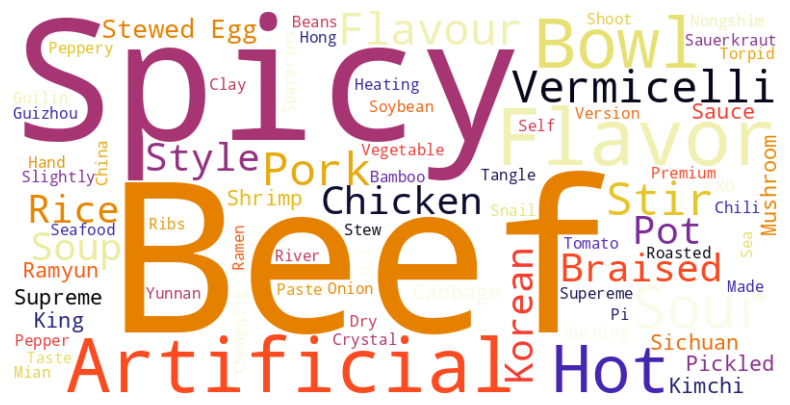

In [ ]:
make_wordcloud('style and round_stars',"Bowl 4.0")

## style이 Cup이고 반올림한 평점이 4.0인 라면들의 특징

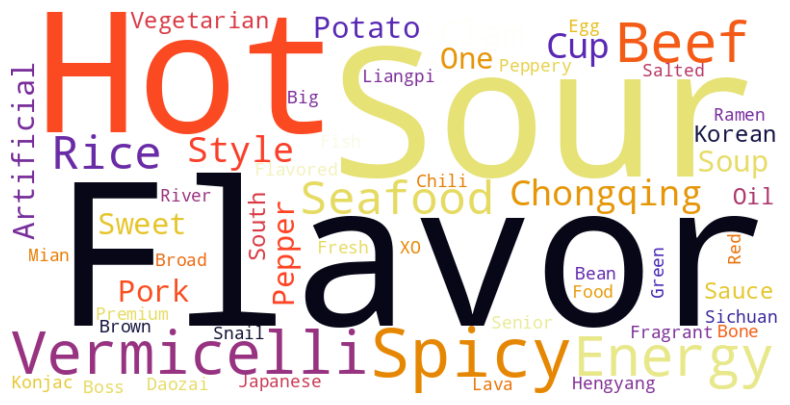

In [ ]:
make_wordcloud('style and round_stars',"Cup 4.0")

## style이 Tray이고 반올림한 평점이 4.0인 라면들의 특징

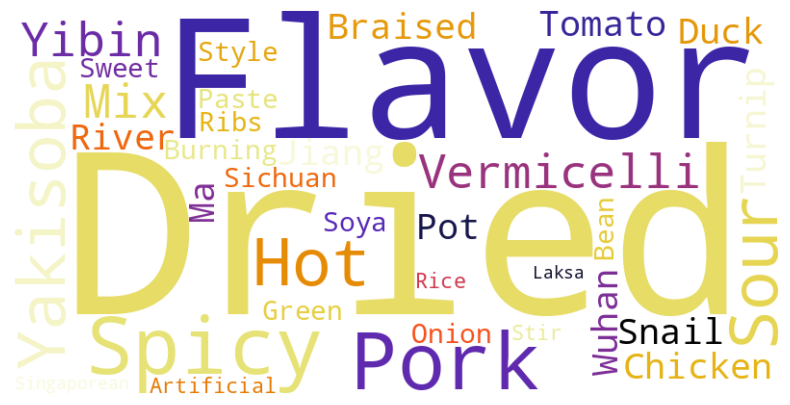

In [ ]:
make_wordcloud('style and round_stars',"Tray 4.0")